# Numerical Transformation Introduction

This this process helps our model better compare features and, most importantly, improve our model’s accuracy and interpretability. That sounds like some good reasons to put the time and effort into numerical transformations if I do say so myself.

I’ll focus on the numerical transformations like:

* Centering
* Standard Scaler
* Min and Max Scaler
* Binning
* Log transformations

In [1]:
import pandas as pd

data = pd.read_csv("profile.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        17000 non-null  int64  
 1   gender            14825 non-null  object 
 2   age               17000 non-null  int64  
 3   id                17000 non-null  object 
 4   became_member_on  17000 non-null  int64  
 5   income            14825 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 797.0+ KB


-> Cenring data

This process helps us understand how far above or below each of our data points is from the mean.

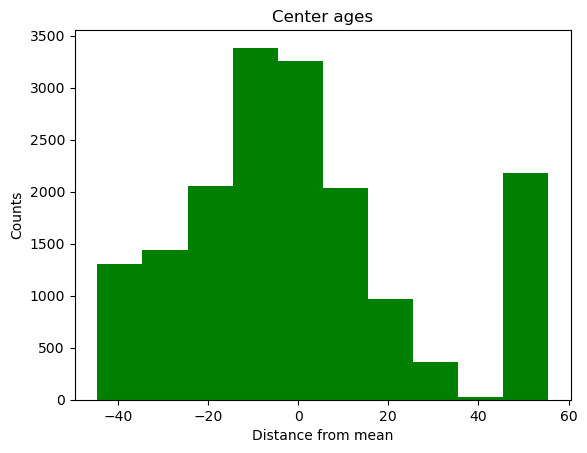

In [2]:
# import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import csv file
data = pd.read_csv("profile.csv")

# get min & max values from age column
ages = data["age"]
min_age = np.min(ages)
max_age = np.max(ages)

# get mean ages
mean_age = np.mean(ages)

# center data
centered_age = ages - mean_age

# plot histogram
plt.hist(centered_age, color = "green")
plt.title("Center ages")
plt.xlabel("Distance from mean")
plt.ylabel("Counts")
plt.show()

-> Standardizing 

Standardization (also known as Z-Score normalization) is when center data, then divide it by the standard deviation. Once i do that, entire data set will have a mean of zero and a standard deviation of one. This allows all of features to be on the same scale.

I’ll definitely want to standardize data in the following situations:

* Before Principal Component Analysis
* Before using any clustering or distance based algorithm (think KMeans or DBSCAN)
* Before KNN
* Before performing regularization methods like LASSO and Ridge

In [12]:
# import lib
import pandas as pd
import numpy as np

# read csv file & get columns age
data = pd.read_csv("profile.csv")
ages = data["age"]

# find the mean of ages
mean_age = np.mean(ages)

# find the standard deviation of ages
std_dev_age = np.std(ages)

# standardize ages
age_standardized = (ages - mean_age) / std_dev_age

# show type of age of ter standardized
print(type(age_standardized))
# show the mean & standard deviation of ages after standardized
print("mean of age after st:", np.mean(age_standardized))
print("std of age after std:", np.std(age_standardized))

<class 'pandas.core.series.Series'>
mean of age after st: 9.221381828063065e-17
std of age after std: 0.9999999999999603


-> Standardizing (with Sklearn)

In [2]:
# import lib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# read csv file
data = pd.read_csv("profile.csv")
ages = data["age"]

# instantiate StandardScaler
scaler = StandardScaler()

# reshape feature
reshaped_ages = np.array(ages).reshape(-1, 1)

# fit transform(start scaler data)
scaled_ages = scaler.fit_transform(reshaped_ages)

# show mean & standard deviation
print("mean of age after scaled:", np.mean(scaled_ages))
print("std of age after scaled:", np.std(scaled_ages))

mean of age after scaled: 1.1723955140041654e-16
std of age after scaled: 1.0


-> Min-Max Normalization

find the minimum and maximum data point in entire data set and set each of those to 0 and 1, respectively. Then the rest of the data points will transform to a number between 0 and 1.

this transformation does not work well with data that has extreme outliers. You will want to perform a min-max normalization if the range between your min and max point is not too drastic.

In [7]:
# import lib
import pandas as pd
import numpy as np

# read csv file & get column age
data = pd.read_csv("profile.csv")
income = data["income"]

# find min income & max income 
min_income = np.min(income)
max_income = np.max(income)

# find the differnce(range) between max and min
range_income = max_income - min_income

# Normalize income column
normalized_income = (income - min_income) / range_income

# show result after normalized
normalized_income.head(5)

0         NaN
1    0.911111
2         NaN
3    0.777778
4         NaN
Name: income, dtype: float64

-> Min-Max Normalization (with Sklearn)

In [1]:
# import lib
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# read csv file
data = pd.read_csv("profile.csv")
ages = data["age"]

# reshaped the array
reshaped_age = np.array(ages).reshape(-1, 1)

# instantiate MinMaxSaler
mmscaler = MinMaxScaler()

# normalized data
reshaped_scaled = mmscaler.fit_transform(reshaped_age)

# show min & max from normalized array to recheck that 0 and 1
print(np.min(reshaped_scaled), np.max(reshaped_scaled))

0.0 1.0


-> Binning data

Binning data is the process of taking numerical or categorical data and breaking it up into groups. bin data can help capture patterns in noisy data.

18 118


C:\Users\tarza\AppData\Local\Temp\ipykernel_22704\3515475174.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ages["binned_ages"] = pd.cut(ages, bins_age, right = False)


0    [50.0, 118.1)
1    [50.0, 118.1)
2    [50.0, 118.1)
3    [50.0, 118.1)
4    [50.0, 118.1)
Name: age, dtype: category
Categories (4, interval[float64, left]): [[0.0, 18.0) < [18.0, 30.0) < [30.0, 50.0) < [50.0, 118.1)]


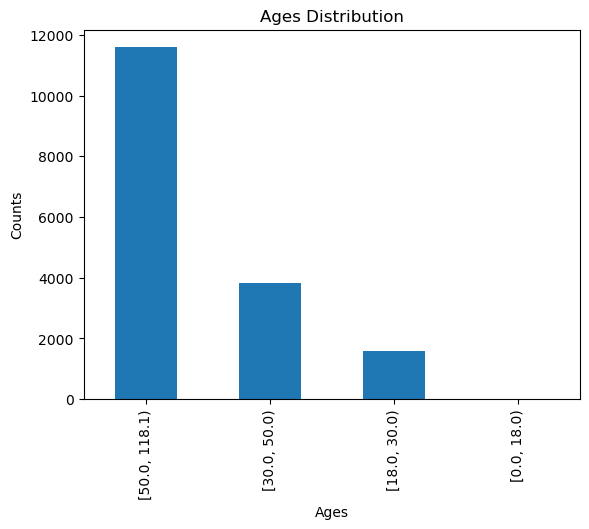

In [5]:
# mport lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read csv file
data = pd.read_csv("profile.csv")
ages = data["age"]

# show min & max of ages
print(np.min(ages), np.max(ages))

# set bins boundaries
bins_age = [0, 18, 30, 50, 118.1]

# creaet new column "binned_ages"
ages["binned_ages"] = pd.cut(ages, bins_age, right = False)

# show some 5 columns
print(ages["binned_ages"].head(5))

# plot bar graph(visualize)
ages["binned_ages"].value_counts().plot(kind = "bar")
plt.title("Ages Distribution")
plt.xlabel("Ages")
plt.ylabel("Counts")
plt.show()

-> Natural Log Transformation

This transformation works well for right-skewed data and data with large outliers, one large benefit is that it will allow the data to be closer to a “normal” distribution. It also changes the scale so our data points will drastically reduce the range of their values.

* Using a log transformation in a machine learning model will require some extra interpretation. For example, if you were to log transform your data in a linear regression model, our independent variable has a multiplication relationship with our dependent variable instead of the usual additive relationship we would have if our data was not log-transformed.

* Keep in mind, just because your data is skewed does not mean that a log transformation is the best answer. You would not want to log transform your feature if:
    * You have values less than 0. The natural logarithm (which is what we’ve been talking about) of a negative number is undefined.
    * You have left-skewed data. That data may call for a square or cube transformation.
    * You have non-parametric data

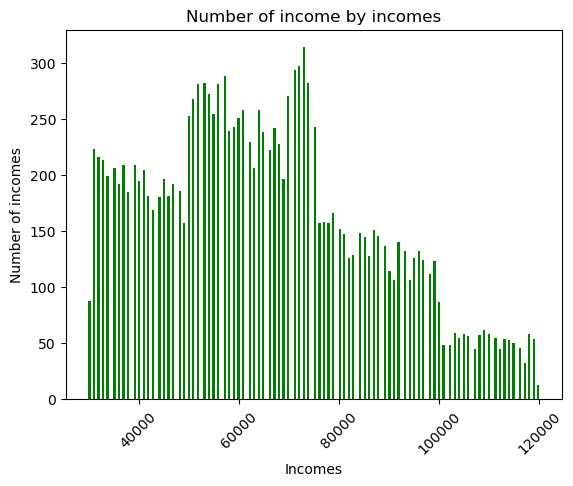

In [6]:
# import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read csv file
data = pd.read_csv("profile.csv")
income = data["income"]

plt.hist(income, bins = 200, color = "g")
plt.xticks(rotation = 45)
plt.title("Number of income by incomes")
plt.xlabel("Incomes")
plt.ylabel("Number of incomes")
plt.show()

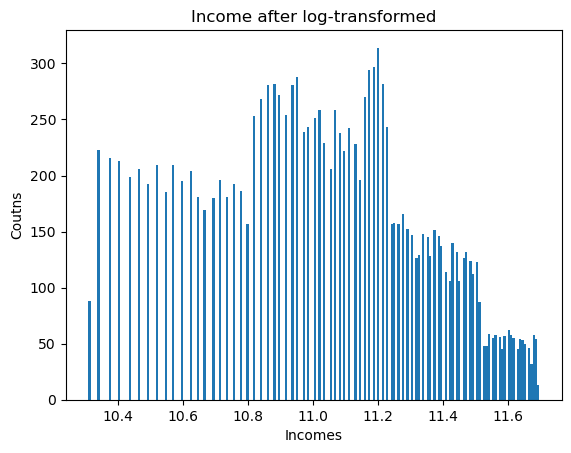

In [11]:
# log transform income
log_income = np.log(income)

# plot a histogram of log_income
plt.hist(log_income, bins = 200)
plt.title("Income after log-transformed")
plt.xlabel("Incomes")
plt.ylabel("Coutns")
plt.show()

Expected results will be left-skewed for sure, But in this dataset i don't have data that be right-skewed, so this column "income" looks close to right-skewed than other columns. I choosed that just for example.